In [2]:
from scipy.stats import norm
import numpy as np

def black_scholes_call(S, K, T, r, sigma):
    """Calculate the Black-Scholes call option price."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


In [3]:
S = 100     # current stock price
K = 105     # strike price
T = 1       # time to maturity (in years)
r = 0.05    # risk-free interest rate
sigma = 0.2 # volatility

price = black_scholes_call(S, K, T, r, sigma)
print(f"Call Option Price: ${price:.2f}")


Call Option Price: $8.02


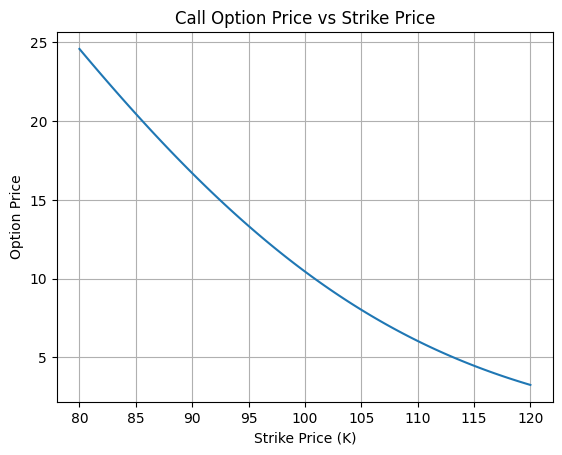

In [4]:
import matplotlib.pyplot as plt

Ks = np.linspace(80, 120, 100)
prices = [black_scholes_call(S=100, K=k, T=1, r=0.05, sigma=0.2) for k in Ks]

plt.plot(Ks, prices)
plt.title("Call Option Price vs Strike Price")
plt.xlabel("Strike Price (K)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()


In [5]:
def binomial_tree_call(S, K, T, r, sigma, steps=100):
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    prices = [S * (u ** j) * (d ** (steps - j)) for j in range(steps + 1)]
    values = [max(price - K, 0) for price in prices]
    
    for i in range(steps - 1, -1, -1):
        values = [np.exp(-r * dt) * (p * values[j + 1] + (1 - p) * values[j]) for j in range(i + 1)]
    
    return values[0]
bt_price = binomial_tree_call(S=100, K=105, T=1, r=0.05, sigma=0.2)
print(f"Binomial Tree Option Price: ${bt_price:.2f}")


Binomial Tree Option Price: $8.03
